In [3]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from ai_tools import ModelFilterAmplifier
from librosa import load
from utils.audio_tools import create_audio_player
from librosa import power_to_db
from utils.displays import display_mel_spectrogram
from soundfile import write
from os.path import join
from os import makedirs
import utils.constants as consts

PATH_TO_MODEL: str = '../runs/models/model_3/epoch-96.pb'
PATH_TO_AUDIO: str = '../long-audio/break_2.wav'
OUTPUT_DIR: str = '../feature_visualization'

makedirs(OUTPUT_DIR, exist_ok=True)
makedirs(join(OUTPUT_DIR, 'mel_specs'), exist_ok=True)

Get indices of Conv block layers.

<Figure size 432x288 with 0 Axes>

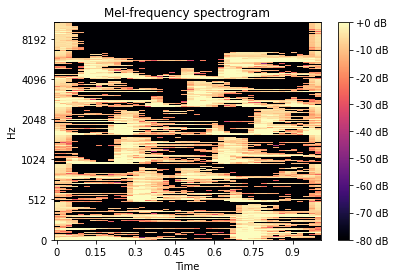

<Figure size 432x288 with 0 Axes>

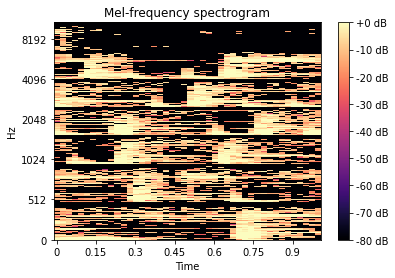

<Figure size 432x288 with 0 Axes>

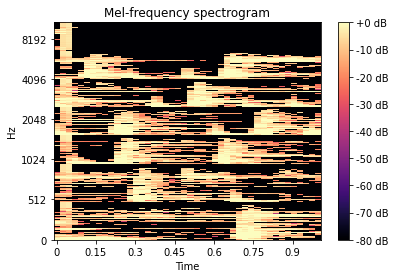

<Figure size 432x288 with 0 Axes>

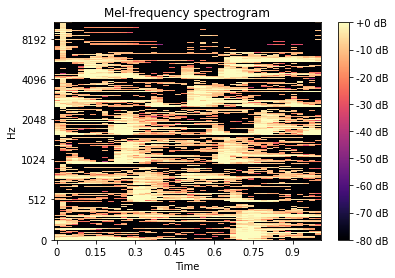

<Figure size 432x288 with 0 Axes>

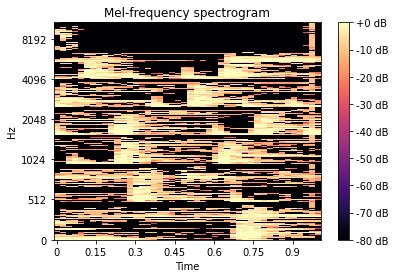

<Figure size 432x288 with 0 Axes>

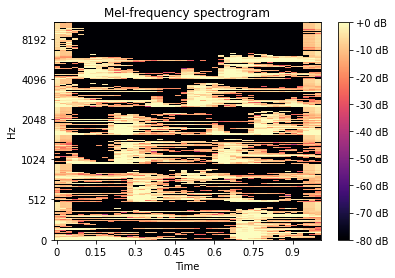

<Figure size 432x288 with 0 Axes>

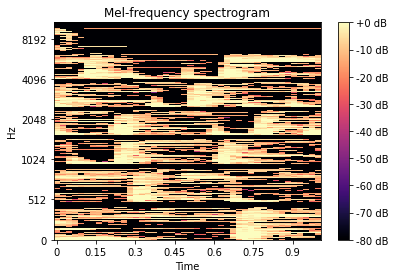

<Figure size 432x288 with 0 Axes>

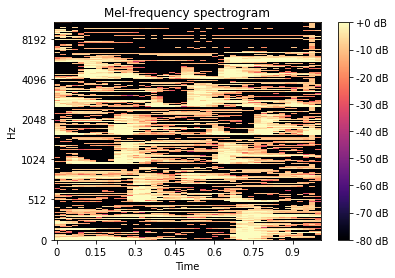

<Figure size 432x288 with 0 Axes>

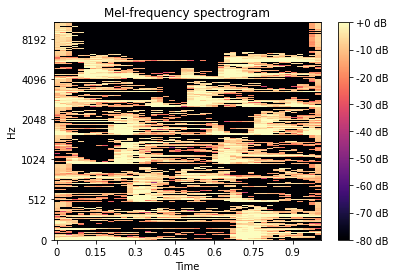

<Figure size 432x288 with 0 Axes>

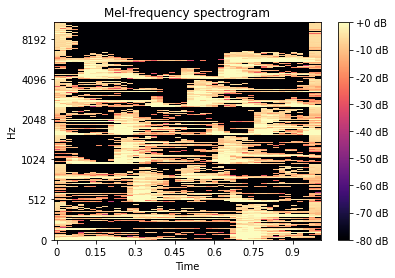

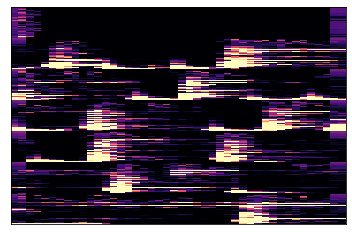

In [9]:
from matplotlib import pyplot as plt
from librosa.display import specshow


# Load model and sample.
model: Model = load_model(PATH_TO_MODEL)
sample: np.ndarray = load(PATH_TO_AUDIO)[0]

model_filter_amplifier = ModelFilterAmplifier(model)

for neuron_i in range(10):
    audio_signal, mel_spec = model_filter_amplifier(
        sample,
        neuron_i,
        iterations=1,
        filter_amount=0.04  # Mild high cut.
    )  # type: np.ndarray, np.ndarray

    create_audio_player(audio_signal)
    display_mel_spectrogram(mel_spec)

    neuron_name: str = f'neuron_{neuron_i}'

    # Write audio file.
    write(join(OUTPUT_DIR, neuron_name) + '.wav', audio_signal, samplerate=consts.SAMPLE_RATE)

    # Write mel spectrogram to file.
    specshow(mel_spec, sr=consts.SAMPLE_RATE)
    plt.savefig(join(OUTPUT_DIR, 'mel_specs', neuron_name + '.png'))